In [281]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor

In [282]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],axis = 0)
print (train.shape,test.shape,data.shape)

(576, 7) (200, 6) (776, 7)


In [283]:
print (train.shape,test.shape,data.shape)

(576, 7) (200, 6) (776, 7)


In [284]:
data.isnull().sum()

Made Donation in March 2007    200
Months since First Donation      0
Months since Last Donation       0
Number of Donations              0
Total Volume Donated (c.c.)      0
Unnamed: 0                       0
source                           0
dtype: int64

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 199
Data columns (total 7 columns):
Made Donation in March 2007    576 non-null float64
Months since First Donation    776 non-null int64
Months since Last Donation     776 non-null int64
Number of Donations            776 non-null int64
Total Volume Donated (c.c.)    776 non-null int64
Unnamed: 0                     776 non-null int64
source                         776 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 48.5+ KB


In [286]:
data['freq_of_donation'] = (data['Months since First Donation'] - data['Months since Last Donation'])/data['Number of Donations']

In [287]:
data['vol_in_one_go'] = data['Total Volume Donated (c.c.)']/data['Number of Donations']

In [288]:
data = data.drop('vol_in_one_go',axis = 1)

In [289]:
data.set_index('Unnamed: 0',inplace = True)

In [290]:
data.don_cat.value_counts()

AttributeError: 'DataFrame' object has no attribute 'don_cat'

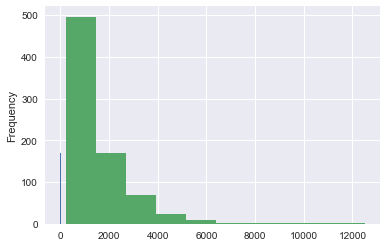

In [291]:
data['Number of Donations'].plot('hist',bins = 10)
bins = (0,1,3,7,11,14,17,20,50)
data['don_cat'] = pd.cut(data['Number of Donations'],bins,labels = [1,2,3,4,5,6,7,8])
data['Total Volume Donated (c.c.)'].plot('hist',bins = 10)
bins = (249,1250,2500,3900,5200,max(data['Total Volume Donated (c.c.)']))
labels = ('mayank','kinshuk','yogesh','rahul','prashant')
data['categorised'] = pd.cut(data['Total Volume Donated (c.c.)'],bins,labels  = labels)
data = data.drop(['Total Volume Donated (c.c.)','Number of Donations'],axis = 1)


In [292]:
pd.concat([one_hot,two_hot],axis = 1)

,cat_mayank,cat_kinshuk,cat_yogesh,cat_rahul,cat_prashant,don_cat_1,don_cat_2,don_cat_3,don_cat_4,don_cat_5,don_cat_6,don_cat_7,don_cat_8
Unnamed: 0,,,,,,,,,,,,,
619,0,0,0,0,1,0,0,0,0,0,0,0,1
664,0,0,1,0,0,0,0,0,0,1,0,0,0
441,0,0,0,1,0,0,0,0,0,0,1,0,0
160,0,0,0,1,0,0,0,0,0,0,0,1,0
358,0,0,0,0,1,0,0,0,0,0,0,0,1
335,1,0,0,0,0,0,0,1,0,0,0,0,0
47,0,1,0,0,0,0,0,1,0,0,0,0,0
164,0,0,1,0,0,0,0,0,0,1,0,0,0
736,0,0,0,0,1,0,0,0,0,0,0,0,1


In [293]:
one_hot = pd.get_dummies(data['categorised'],prefix = 'cat')
two_hot = pd.get_dummies(data['don_cat'],prefix = 'don_cat')
new = pd.concat([one_hot,two_hot],axis = 1)
data = pd.concat([data,new],axis = 1)
data = data.drop(['categorised','don_cat'],axis = 1)

In [294]:
train = data[data['source']=='train']
test = data[data['source']=='test']
train = train.drop('source',axis = 1)
test = test.drop('source',axis = 1)
test = test.drop('Made Donation in March 2007',axis = 1)
y = train['Made Donation in March 2007']
X = train.drop('Made Donation in March 2007',axis =1)


In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {'min_samples_split': [2,3,4],'n_estimators':[20],'min_samples_leaf':[8,12,14]}
grid = GridSearchCV(clf,param_grid = params, cv = 10,scoring='neg_log_loss')

In [296]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4], 'n_estimators': [20], 'min_samples_leaf': [8, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [240]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.25)
reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=14, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,oob_score=False, random_state=None, verbose=0,warm_start=False)
reg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
reg.feature_importances_

array([ 0.2085407 ,  0.2436754 ,  0.27259209,  0.07015067,  0.03304305,
        0.00349312,  0.        ,  0.        ,  0.05780906,  0.04005087,
        0.03355033,  0.0322029 ,  0.0048918 ,  0.        ,  0.        ,  0.        ])

In [166]:
X_train

,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),freq_of_donation
Unnamed: 0,,,,,
596,52,4,6,1500,8.000000
600,49,9,11,2750,3.636364
704,73,14,7,1750,8.428571
204,79,14,3,750,21.666667
164,35,1,12,3000,2.833333
11,16,7,2,500,4.500000
327,25,21,2,500,2.000000
347,16,16,1,250,0.000000
474,23,12,11,2750,1.000000


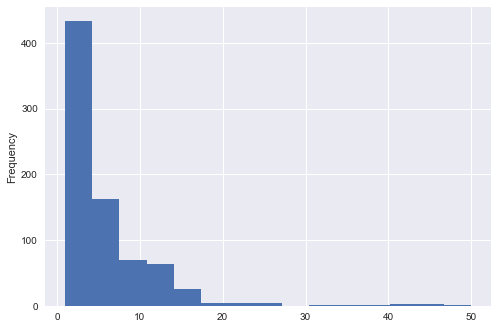

In [200]:
data['Number of Donations'].plot(kind = 'hist',bins = 15)

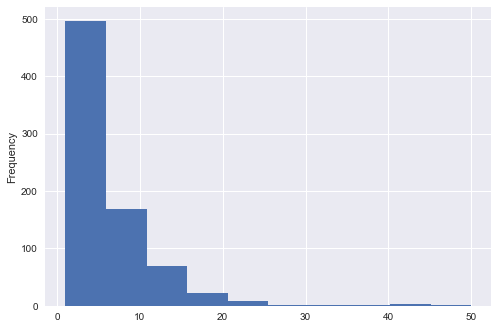

In [201]:
data['Number of Donations'].plot('hist',bins = 10)
bins = (0,1,3,7,11,14,17,20,50)
data['don_cat'] = pd.cut(data['Number of Donations'],bins,labels)

In [241]:
pred = grid.predict_proba(X_validation)

In [242]:
pred

array([[ 0.79986025,  0.20013975],
       [ 0.80171616,  0.19828384],
       [ 0.68681751,  0.31318249],
       [ 0.77689095,  0.22310905],
       [ 0.44788141,  0.55211859],
       [ 0.83249971,  0.16750029],
       [ 0.39739653,  0.60260347],
       [ 0.84711678,  0.15288322],
       [ 0.89586084,  0.10413916],
       [ 0.82603758,  0.17396242],
       [ 0.92554382,  0.07445618],
       [ 0.79986025,  0.20013975],
       [ 0.92295137,  0.07704863],
       [ 0.63259809,  0.36740191],
       [ 0.50349289,  0.49650711],
       [ 0.88027369,  0.11972631],
       [ 0.95490403,  0.04509597],
       [ 0.54418147,  0.45581853],
       [ 0.73718238,  0.26281762],
       [ 0.92554382,  0.07445618],
       [ 0.83030542,  0.16969458],
       [ 0.57877829,  0.42122171],
       [ 0.89586084,  0.10413916],
       [ 0.4144972 ,  0.5855028 ],
       [ 0.79986025,  0.20013975],
       [ 0.58343762,  0.41656238],
       [ 0.79986025,  0.20013975],
       [ 0.75544325,  0.24455675],
       [ 0.83249971,

In [302]:
from sklearn.metrics import log_loss
print (log_loss(y_validation,pred))

0.458994885286


In [172]:
outlier = data['Total Volume Donated (c.c.)']>=3800
data.loc[outlier,'Total Volume Donated (c.c.)'] = data

In [174]:
outlier

Unnamed: 0
619     True
664    False
441     True
160     True
358     True
335    False
47     False
164    False
736     True
436    False
460    False
285    False
499    False
356    False
40     False
191    False
638    False
345    False
463    False
372    False
8      False
539    False
734    False
573    False
482    False
330    False
222    False
175    False
606     True
340    False
       ...  
131    False
405    False
82     False
643     True
156    False
617    False
574    False
272    False
613    False
545    False
685    False
570    False
537    False
691    False
85      True
483    False
455    False
93     False
744    False
33     False
321     True
523    False
426    False
196    False
301    False
103    False
224    False
454    False
585    False
154    False
Name: Total Volume Donated (c.c.), Length: 776, dtype: bool

In [134]:
df = pd.DataFrame({' ':test_raw['Unnamed: 0'].astype('float'),'Made Donation in March 2007':predict})
df.to_csv('last_day.csv')

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [178]:
for i in data.columns:
    print (data[i].value_counts())

0.0    438
1.0    138
Name: Made Donation in March 2007, dtype: int64
4     60
16    52
14    44
2     37
23    36
28    36
11    35
26    34
35    30
21    28
38    24
52    22
58    19
64    16
40    14
46    13
41    12
33    12
34    11
98    10
86     9
50     9
22     9
70     9
77     7
76     7
45     7
47     7
57     7
39     7
      ..
59     4
43     4
95     4
49     4
15     3
24     3
82     3
60     3
30     3
31     3
32     3
18     2
10     2
63     2
61     2
93     2
78     2
73     2
42     2
83     2
53     2
81     2
17     1
54     1
13     1
12     1
65     1
36     1
3      1
55     1
Name: Months since First Donation, Length: 78, dtype: int64
2     179
4     163
11     91
14     78
16     64
23     51
21     45
9      20
3      14
1       9
7       8
5       7
12      7
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Month

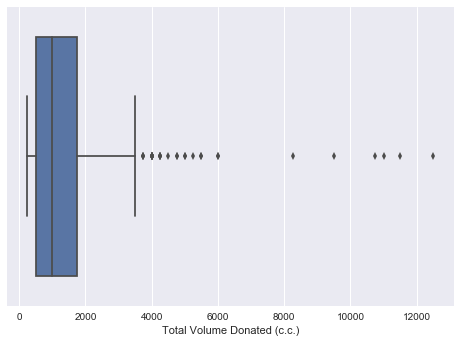

In [140]:
#using the train_test_split my own training data
import seaborn as sns
sns.boxplot(x = X['Total Volume Donated (c.c.)'])

In [149]:
data['Total Volume Donated (c.c.)'].dtype

dtype('int64')

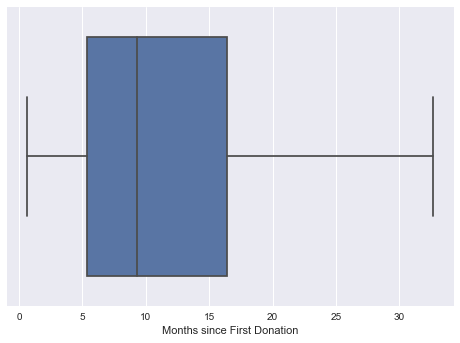

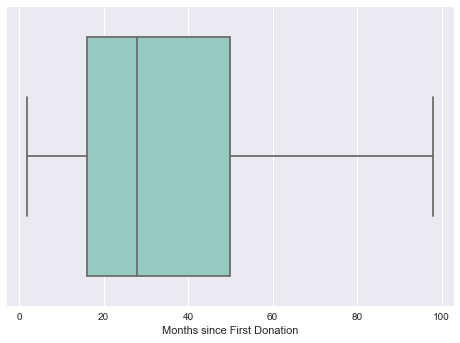

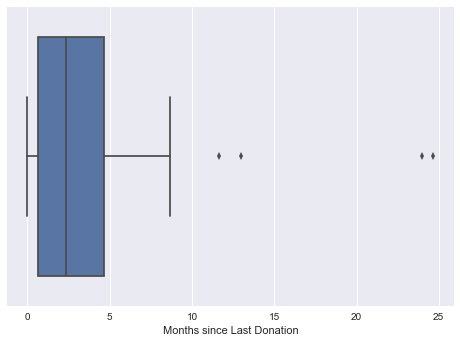

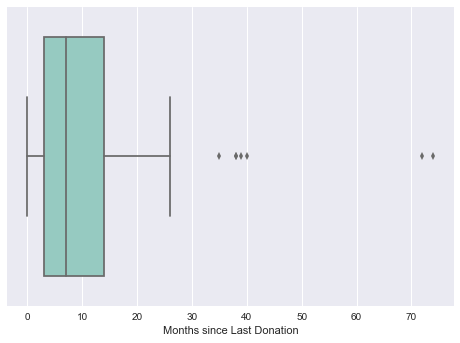

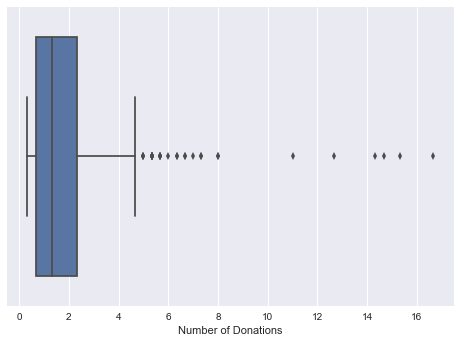

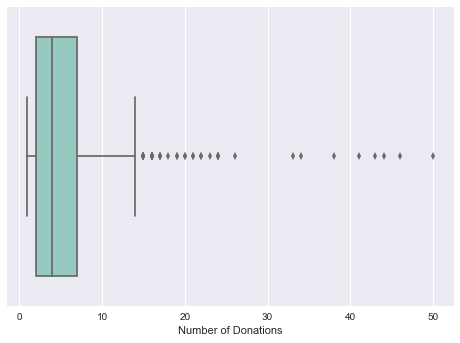

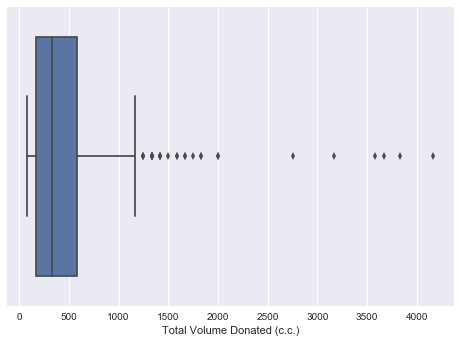

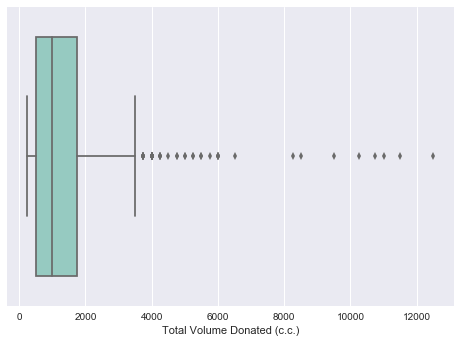

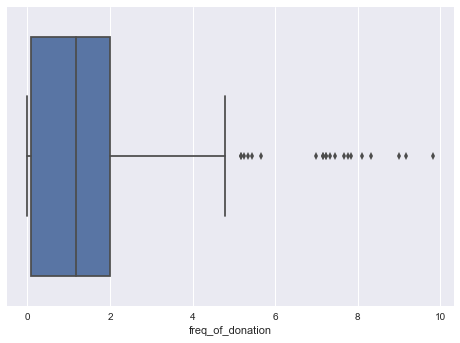

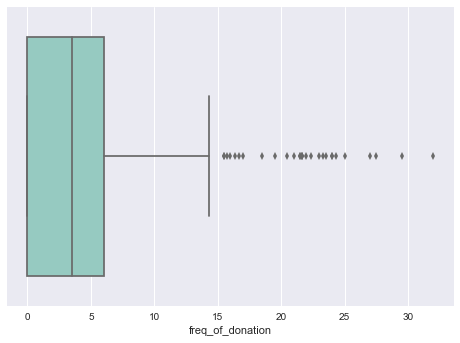

In [159]:
for i in X.columns:
    if X[i].dtype != 'object':
        sns.boxplot((X[i])**1/3)
        plt.show()
        sns.boxplot(x=i, hue="Made Donation in March 2007",data=data, palette="Set3")
        plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 5 columns):
Months since First Donation    576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
freq_of_donation               576 non-null float64
dtypes: float64(1), int64(4)
memory usage: 47.0 KB


In [271]:
from xgboost import XGBClassifier
params = {}
#params["objective"] = "binary:logistic"
params['learning_rate'] = [0.01,0.015,0.05,1]
params['gamma'] = [0.05,0.3,0.1]
params['max_depth'] = [5,7,10]
params['min_child_weight'] = [5,7]
xgb = XGBClassifier(objective = "binary:logistic" )
rek = GridSearchCV(xgb,param_grid = params,cv = 10,scoring = 'neg_log_loss')

In [272]:
rek.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.015, 0.05, 1], 'gamma': [0.05, 0.3, 0.1], 'max_depth': [5, 7, 10], 'min_child_weight': [5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [273]:
rek.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.3, learning_rate=0.015, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [279]:
model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.3, learning_rate=0.015, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [275]:
model.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.3, learning_rate=0.015, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [276]:
pred = model.predict_proba(test)

In [277]:
predi_proba = []
for i in pred:
    predi_proba.append(i[1])

In [278]:
df = pd.DataFrame({' ':test_raw['Unnamed: 0'].astype('float'),'Made Donation in March 2007':predi_proba})
df.to_csv('last_day1.csv')

In [298]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.3, learning_rate=0.015, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [301]:
pred = model.predict_proba(X_validation)

In [309]:
from tpot import TPOTClassifier
tpoy = TPOTClassifier(generations=5, population_size=20, cv=5,random_state=42, verbosity=2,scoring = 'neg_log_loss')

In [310]:
tpoy.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.5117188042208111


Generation 2 - Current best internal CV score: 0.5117188042208111


Generation 3 - Current best internal CV score: 0.5117188042208111


Generation 4 - Current best internal CV score: 0.508343938518655


Generation 5 - Current best internal CV score: 0.508343938518655



Best pipeline: RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=DEFAULT, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.2, RandomForestClassifier__min_samples_leaf=10, RandomForestClassifier__min_samples_split=14, RandomForestClassifier__n_estimators=DEFAULT)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        generations=5, max_eval_time_mins=5, max_time_mins=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=20, population_size=20,
        random_state=42, scoring=None, subsample=1.0, verbosity=2,
        warm_start=False)

In [315]:
eff = RandomForestClassifier( criterion='gini', max_features=0.2, min_samples_leaf=10, min_samples_split=14 )

In [318]:
eff.fit(X_train,y_train)
pred = eff.predict_proba(X_validation)

In [319]:
print (log_loss(y_validation,pred))

0.440142611071


In [320]:
eff.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [321]:
pred = eff.predict_proba(test)
predi_proba = []
for i in pred:
    predi_proba.append(i[1])
df = pd.DataFrame({' ':test_raw['Unnamed: 0'].astype('float'),'Made Donation in March 2007':predi_proba})
df.to_csv('last_day2.csv')

In [322]:
data

,Made Donation in March 2007,Months since First Donation,Months since Last Donation,source,freq_of_donation,cat_mayank,cat_kinshuk,cat_yogesh,cat_rahul,cat_prashant,don_cat_1,don_cat_2,don_cat_3,don_cat_4,don_cat_5,don_cat_6,don_cat_7,don_cat_8
Unnamed: 0,,,,,,,,,,,,,,,,,,
619,1.0,98,2,train,1.920000,0,0,0,0,1,0,0,0,0,0,0,0,1
664,1.0,28,0,train,2.153846,0,0,1,0,0,0,0,0,0,1,0,0,0
441,1.0,35,1,train,2.125000,0,0,0,1,0,0,0,0,0,0,1,0,0
160,1.0,45,2,train,2.150000,0,0,0,1,0,0,0,0,0,0,0,1,0
358,0.0,77,1,train,3.166667,0,0,0,0,1,0,0,0,0,0,0,0,1
335,0.0,4,4,train,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0
47,1.0,14,2,train,1.714286,0,1,0,0,0,0,0,1,0,0,0,0,0
164,0.0,35,1,train,2.833333,0,0,1,0,0,0,0,0,0,1,0,0,0
736,1.0,98,5,train,2.021739,0,0,0,0,1,0,0,0,0,0,0,0,1
